In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [117]:
allCones = pd.read_csv('allCones.csv', index_col=0)

In [118]:
allCones['data'] = allCones.apply(lambda row : np.array(eval(row['data'])), axis = 1)

In [120]:
allCones.head()

,colour,data
0,Blue,"[[3.5412579, 1.1636225, -0.59038377, 6.0, 3.0]..."
1,Blue,"[[6.7550807, -4.2736859, -0.69933766, 3.0, 5.0..."
2,Blue,"[[4.1182308, 0.39291489, -0.5079515, 27.0, 4.0..."
3,Blue,"[[6.4241595, -2.0304615, -0.82724917, 1.0, 4.0..."
4,Blue,"[[2.6979296, 2.3427958, -0.43872967, 30.0, 4.0..."


In [121]:
allCones['data'].head()

0    [[3.5412579, 1.1636225, -0.59038377, 6.0, 3.0]...
1    [[6.7550807, -4.2736859, -0.69933766, 3.0, 5.0...
2    [[4.1182308, 0.39291489, -0.5079515, 27.0, 4.0...
3    [[6.4241595, -2.0304615, -0.82724917, 1.0, 4.0...
4    [[2.6979296, 2.3427958, -0.43872967, 30.0, 4.0...
Name: data, dtype: object

In [122]:
print("Matrix size (LiDAR output): ", allCones['data'][1].shape)
allCones['data'][1]

Matrix size (LiDAR output):  (8, 5)


array([[ 6.7550807 , -4.2736859 , -0.69933766,  3.        ,  5.        ],
       [ 6.7418017 , -4.2983103 , -0.69951195,  4.        ,  5.        ],
       [ 6.7516489 , -4.1715317 , -0.97446734,  2.        ,  4.        ],
       [ 6.7192402 , -4.1823587 , -0.97178626,  6.        ,  4.        ],
       [ 6.6961923 , -4.2005129 , -0.97056752,  9.        ,  4.        ],
       [ 6.6563206 , -4.2079506 , -0.96691149, 11.        ,  4.        ],
       [ 6.6415906 , -4.2311602 , -0.96691149, 11.        ,  4.        ],
       [ 6.6667633 , -4.3460078 , -0.97714853,  3.        ,  4.        ]])

In [123]:
# print("Image size (CNN Input): ", allCones['image'][0].shape)
# allCones['image'][0]

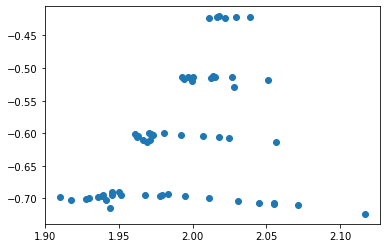

In [124]:
cone = allCones['data'][104]

x_vals = []

z_vals = []

for row in range(0, len(cone)):
    x_vals.append(cone[row][0])
    z_vals.append(cone[row][2])

plt.scatter(x_vals, z_vals)
plt.show()

In [125]:
def find_range(array):
    array = array.T
    x_min, x_max, z_min, z_max = array[0].min(), array[0].max(), array[2].min(), array[2].max()
    return (x_min, x_max, z_min, z_max)

find_range(allCones['data'][1]) # example

(6.6415906, 6.7550807, -0.97714853, -0.69933766)

In [126]:
def map_range(num, org_min, org_max, new_min, new_max):
    mapped_value = new_min + (((new_max - new_min) / (org_max - org_min)) * (num - org_min))
    return round(mapped_value)

map_range(6.6961923, 6.6415906, 6.7550807, 0, 32) # example

15

In [127]:
def convert_to_image(array):
    img = np.zeros([32,32])
    new_min = 0
    new_max = 31
    
    x_min, x_max, z_min, z_max = find_range(array)
    
    for row in array:
        new_x = map_range(row[0], x_min, x_max, new_min, new_max)
        new_z = map_range(row[2], z_min, z_max, new_min, new_max)
        
        img[new_x, new_z] = row[3]

    return img

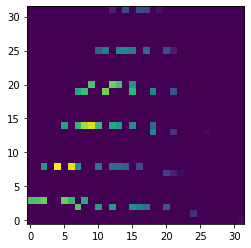

In [141]:
img = convert_to_image(allCones['data'][201]) # example

plt.imshow(img.T, origin='lower')
plt.imsave('test.png', img.T, origin='lower')

In [129]:
allCones['image'] = allCones.apply(lambda row : convert_to_image(row[1]), axis = 1)

In [146]:
allCones.head()

,colour,data,image
0,Blue,"[[3.5412579, 1.1636225, -0.59038377, 6.0, 3.0]...","[[0.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,Blue,"[[6.7550807, -4.2736859, -0.69933766, 3.0, 5.0...","[[0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,Blue,"[[4.1182308, 0.39291489, -0.5079515, 27.0, 4.0...","[[0.0, 19.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
3,Blue,"[[6.4241595, -2.0304615, -0.82724917, 1.0, 4.0...","[[0.0, 28.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,Blue,"[[2.6979296, 2.3427958, -0.43872967, 30.0, 4.0...","[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [150]:
num = 0
dir = 'images'
for img in allCones['image']:
    num = num + 1
    plt.imsave(f'{dir}/{num}.png', img.T, origin='lower')